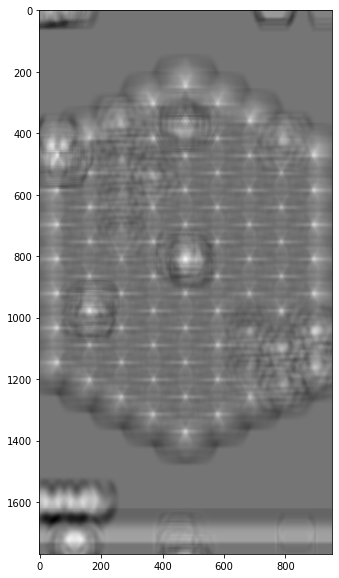

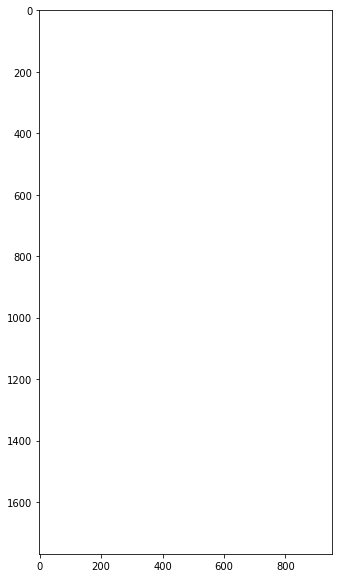

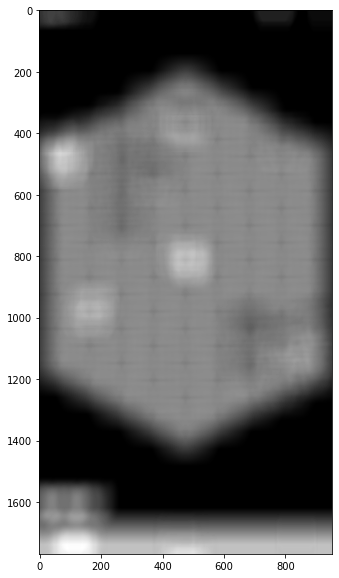

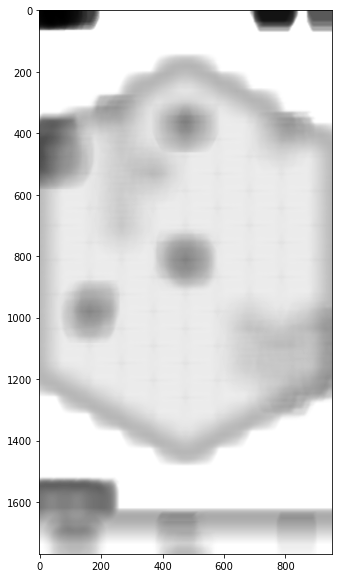

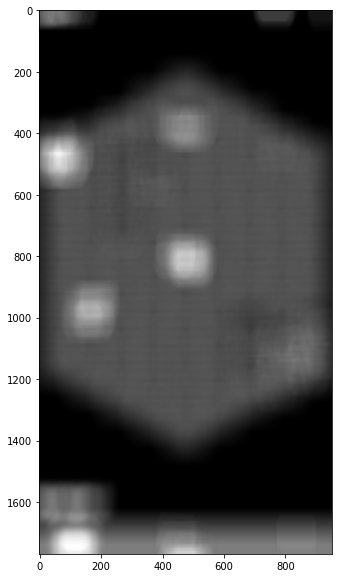

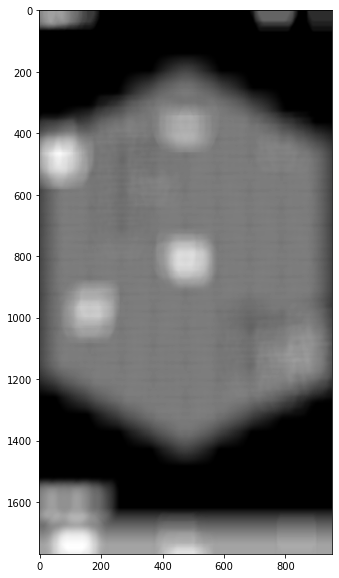

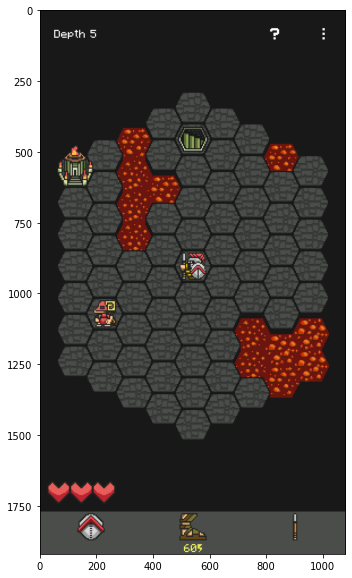

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15,10)
import utils


templates_path = [
    "assets/tile_base.png",
    # "assets/tile_floor.1.png",
    # "assets/tile_floor.2.png",
    # "assets/tile_floor_large.1.png",
    # "assets/tile_floor_large.2.png",
]


def scale_image(scale):
    def f(img):
        width = int(img.shape[1] * scale / 100)
        height = int(img.shape[0] * scale / 100)
        dim = (width, height)
        return cv.resize(img, dim, interpolation=cv.INTER_AREA)
    return f


templates = map(lambda x: cv.imread(x, 0), templates_path)
scaled_templates = map(scale_image(400), templates)
base = cv.imread('screens/1080x1920/simple1.png')
img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)

for template in scaled_templates:
    w, h = template.shape[::-1]
    # https://stackoverflow.com/questions/58158129/understanding-and-evaluating-template-matching-methods
    for method in [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        res = cv.matchTemplate(
            img_gray, template, method, mask=template)
        plt.imshow(res, cmap='gray')
        plt.show()
        # utils.show_image(res)

utils.show_image(base)

nan


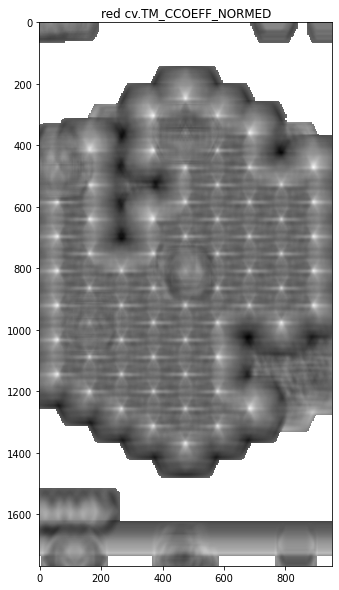

nan


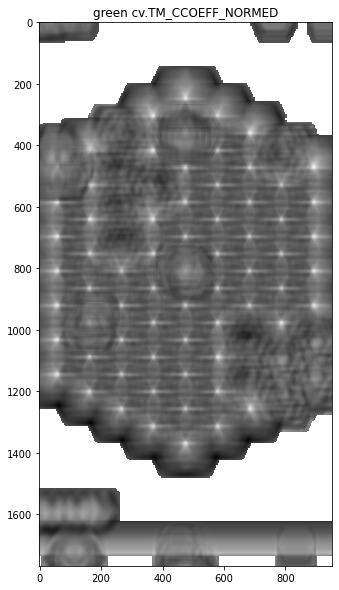

nan


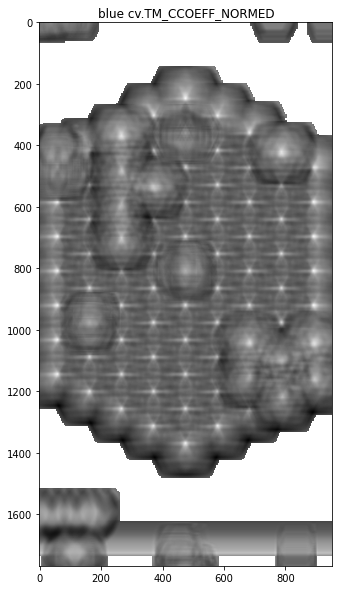

In [6]:

templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x1920/simple1.png')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for template in scaled_templates:
    for templates_split_by_color in map(split_by_colour, scaled_templates):
        for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
            for name,method in zip(methods_names,methods):
                res = cv.matchTemplate(
                    base_color, template_color, method, mask=template_color)
                print(np.amax(res))
                plt.imshow(res, cmap='gray')
                plt.title(f"{color} {name}")
                plt.show()
            # utils.show_image(res)

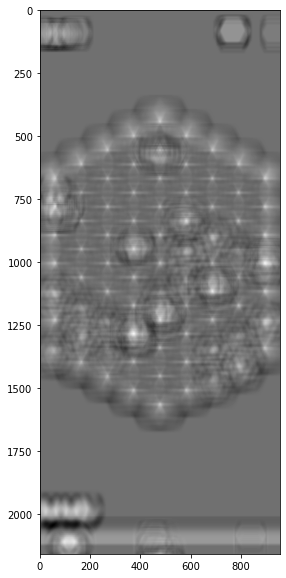

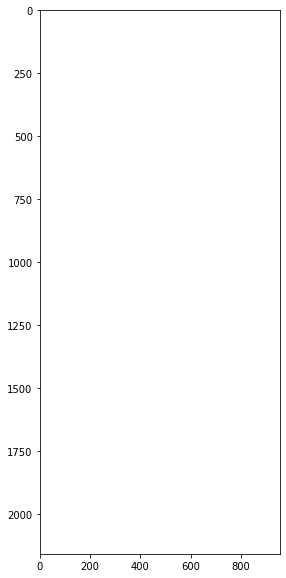

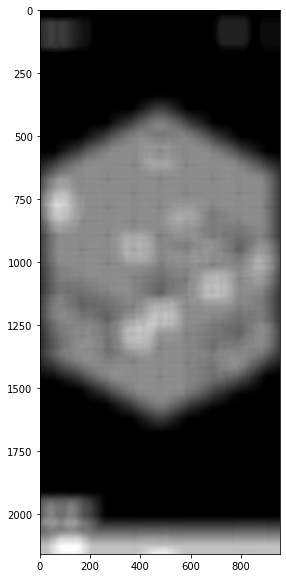

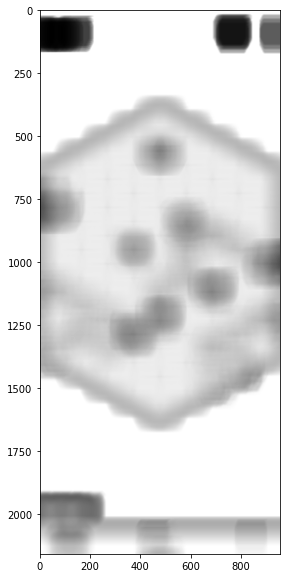

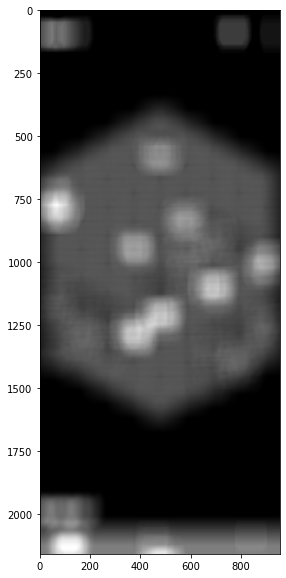

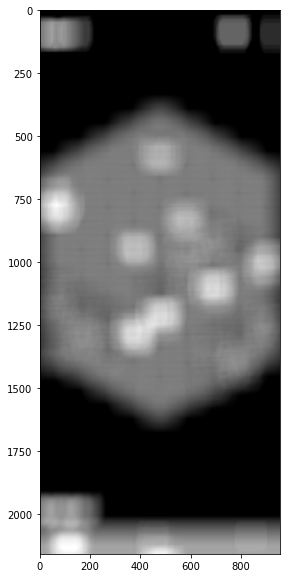

In [7]:

templates = map(lambda x: cv.imread(x, 0), templates_path)
scaled_templates = map(scale_image(400), templates)
base = cv.imread('screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')
img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)

for template in scaled_templates:
    w, h = template.shape[::-1]
    # https://stackoverflow.com/questions/58158129/understanding-and-evaluating-template-matching-methods
    for method in [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        res = cv.matchTemplate(
            img_gray, template, method, mask=template)
        plt.imshow(res, cmap='gray')
        plt.show()
        # utils.show_image(res)